In [42]:
from utilyties import *

In [43]:
# definimos la ruta del geojson de esperanza de vida
RutaEsperanzaVida = 'Social_Economic/esperanza_de_vida.geojson'
RutaIndiceMultidiensional = 'Social_Economic/indice_multidimensional_c.geojson'
RutaProyeccionPoblacion = 'Social_Economic/poblacion__proyeccion_201.geojson'
RutaSedesEducativas = 'Social_Economic/sedes_educativas.geojson'
RutaTasaDesmpleo = 'Social_Economic/tasa_de_desempleo.geojson'
RutaProyeccionViviendas = 'Social_Economic/viviendas_totales__proyec.geojson'
rutaComunas = 'Enviromental/comunas_y_corregimientos.geojson'

In [44]:
# cargamos los datos
EsperanzaVida = gpd.read_file(RutaEsperanzaVida)  
IndiceMultidiensional = gpd.read_file(RutaIndiceMultidiensional)
ProyeccionPoblacion = gpd.read_file(RutaProyeccionPoblacion)
SedesEducativas = gpd.read_file(RutaSedesEducativas)
TasaDesmpleo = gpd.read_file(RutaTasaDesmpleo)
ProyeccionViviendas = gpd.read_file(RutaProyeccionViviendas)
comunas = gpd.read_file(rutaComunas)


In [45]:
#intercambiamas la fila 22 con la fila 15 en comuna
comunas.iloc[22], comunas.iloc[15] = comunas.iloc[15].copy(), comunas.iloc[22].copy()

TasaDesmpleo = TasaDesmpleo.iloc[:-5]
IndiceMultidiensional = IndiceMultidiensional.iloc[:-5]
ProyeccionPoblacion = ProyeccionPoblacion.iloc[:-5]
TasaDesmpleo = TasaDesmpleo.drop(columns=['i_2023'])
comunas = comunas.iloc[:-7]
ProyeccionViviendas = ProyeccionViviendas.iloc[:-9]

In [46]:
# Min X: 4709904.908559153, Min Y: 2240191.138035504, Max X: 4719907.377114352, Max Y: 2257087.593180757
# definimos varialbles del minimos y maximos
minx = 4709904.908559153
miny = 2240191.138035504
maxx = 4719907.377114352
maxy = 2257087.593180757

/tmp/ipykernel_29275/1044942417.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  plt.legend(loc='upper left')


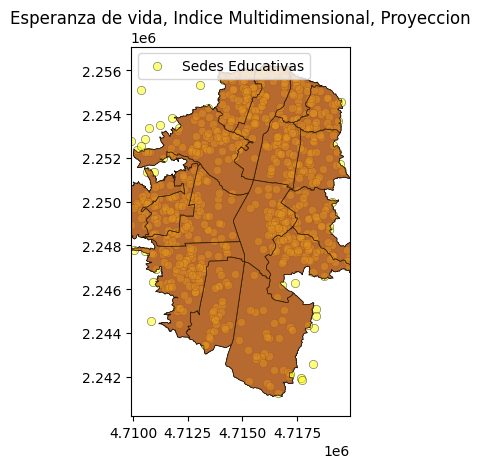

In [47]:
ax = plt.gca()
EsperanzaVida.plot(ax=ax, color='blue', alpha=0.5, edgecolor='k', linewidth=0.5, label='Esperanza de Vida')
IndiceMultidiensional.plot(ax=ax, color='red', alpha=0.5, edgecolor='k', linewidth=0.5, label='Indice Multidimensional')
ProyeccionPoblacion.plot(ax=ax, color='green', alpha=0.5, edgecolor='k', linewidth=0.5, label='Proyeccion Poblacion')
SedesEducativas.plot(ax=ax, color='yellow', alpha=0.5, edgecolor='k', linewidth=0.5, label='Sedes Educativas')
TasaDesmpleo.plot(ax=ax, color='purple', alpha=0.5, edgecolor='k', linewidth=0.5, label='Tasa Desempleo')
ProyeccionViviendas.plot(ax=ax, color='orange', alpha=0.5, edgecolor='k', linewidth=0.5, label='Proyeccion Viviendas')
plt.title('Esperanza de vida, Indice Multidimensional, Proyeccion')
plt.legend(loc='upper left')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.show()


In [48]:
# ... (otras funciones existentes)

def pivot_comunas_indice(df, tipo_indice='total', prefijo_columna='total_', columna_nombre='nombre'):
    """
    Transforma el GeoDataFrame para que cada comuna tenga una columna con sus índices por año.

    Parámetros:
    - df: GeoDataFrame original.
    - tipo_indice: Tipo de índice a utilizar (e.g., 'total', 'hombres', 'mujeres').
    - prefijo_columna: Prefijo de las columnas que contienen los años (e.g., 'total_', 'hombres_').
    - columna_nombre: Nombre de la columna que contiene los nombres de las comunas (default='nombre').

    Retorna:
    - DataFrame pivotado con columnas por comuna y filas por año.
    """
    
    # 1. Identificar las columnas que corresponden al tipo de índice y a los años
    columnas_año = [col for col in df.columns if col.startswith(prefijo_columna)]
    
    if not columnas_año:
        raise ValueError(f"No se encontraron columnas que comiencen con el prefijo '{prefijo_columna}'. Verifica el prefijo proporcionado.")
    
    # 2. Transformar el DataFrame a formato largo
    df_melt = df.melt(
        id_vars=[columna_nombre],
        value_vars=columnas_año,
        var_name='año',
        value_name='indice'
    )
    
    # 3. Extraer el año numérico de las columnas
    df_melt['año'] = df_melt['año'].str.replace(prefijo_columna, '').astype(int)
    
    # 4. Pivotar el DataFrame para tener comunas como columnas
    df_pivot = df_melt.pivot_table(
        index='año',
        columns=columna_nombre,
        values='indice'
    ).reset_index()
    
    # 5. Ordenar el DataFrame por año
    df_pivot = df_pivot.sort_values('año').reset_index(drop=True)
    
    return df_pivot


<Axes: title={'center': 'Proyección de población por comuna y año'}, xlabel='año'>

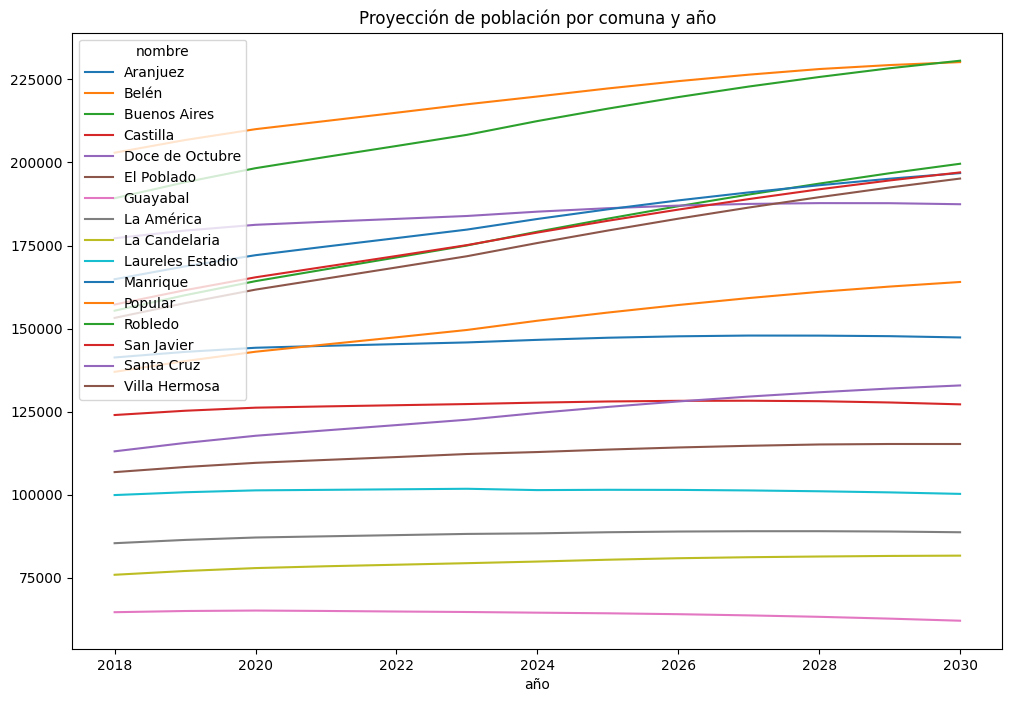

In [49]:
# Llamada a la función para transformar el DataFrame
ProyecPoblaPorAño = pivot_comunas_indice(
    df=ProyeccionPoblacion,
    tipo_indice='total',
    prefijo_columna='total_',
    columna_nombre='nombre'
)

# Mostrar el DataFrame pivotado
ProyecPoblaPorAño.plot(x='año', figsize=(12, 8), title='Proyección de población por comuna y año')

In [50]:
ProyecPoblaPorAño

nombre,año,Aranjuez,Belén,Buenos Aires,Castilla,Doce de Octubre,El Poblado,Guayabal,La América,La Candelaria,Laureles Estadio,Manrique,Popular,Robledo,San Javier,Santa Cruz,Villa Hermosa
0,2018,141312.0,202931.0,155391.0,123992.0,177190.0,106805.0,64651.0,85416.0,75913.0,99904.0,164858.0,136986.0,189238.0,157243.0,113064.0,153216.0
1,2019,142990.0,206745.0,160045.0,125276.0,179493.0,108345.0,65011.0,86403.0,77053.0,100749.0,168724.0,140218.0,194042.0,161562.0,115588.0,157668.0
2,2020,144233.0,210015.0,164279.0,126200.0,181235.0,109600.0,65146.0,87128.0,77926.0,101316.0,172090.0,143039.0,198274.0,165436.0,117744.0,161728.0
3,2021,144815.0,212479.0,167860.0,126587.0,182165.0,110479.0,65024.0,87489.0,78478.0,101473.0,174692.0,145235.0,201656.0,168649.0,119374.0,165061.0
4,2022,145325.0,214967.0,171416.0,126939.0,183012.0,111343.0,64856.0,87849.0,78937.0,101632.0,177232.0,147382.0,204954.0,171854.0,120959.0,168399.0
5,2023,145837.0,217501.0,175014.0,127289.0,183889.0,112257.0,64713.0,88207.0,79404.0,101796.0,179793.0,149586.0,208305.0,175122.0,122573.0,171776.0
6,2024,146611.0,219847.0,179159.0,127722.0,185191.0,112850.0,64509.0,88382.0,79892.0,101396.0,182988.0,152365.0,212453.0,178903.0,124610.0,175756.0
7,2025,147250.0,222266.0,183086.0,128067.0,186227.0,113594.0,64320.0,88714.0,80444.0,101487.0,185895.0,154823.0,216194.0,182447.0,126425.0,179508.0
8,2026,147680.0,224468.0,186832.0,128261.0,187015.0,114223.0,64052.0,88925.0,80892.0,101456.0,188577.0,157097.0,219669.0,185812.0,128072.0,183078.0
9,2027,147905.0,226416.0,190341.0,128292.0,187521.0,114730.0,63691.0,89020.0,81199.0,101296.0,190985.0,159185.0,222840.0,188970.0,129542.0,186425.0


In [51]:
# exportamos a json
ProyecPoblaPorAño.to_json('ProyeccionPoblacionPorAñoPorComuna.json')

<Axes: title={'center': 'Tasa de desempleo por comuna y año'}, xlabel='año'>

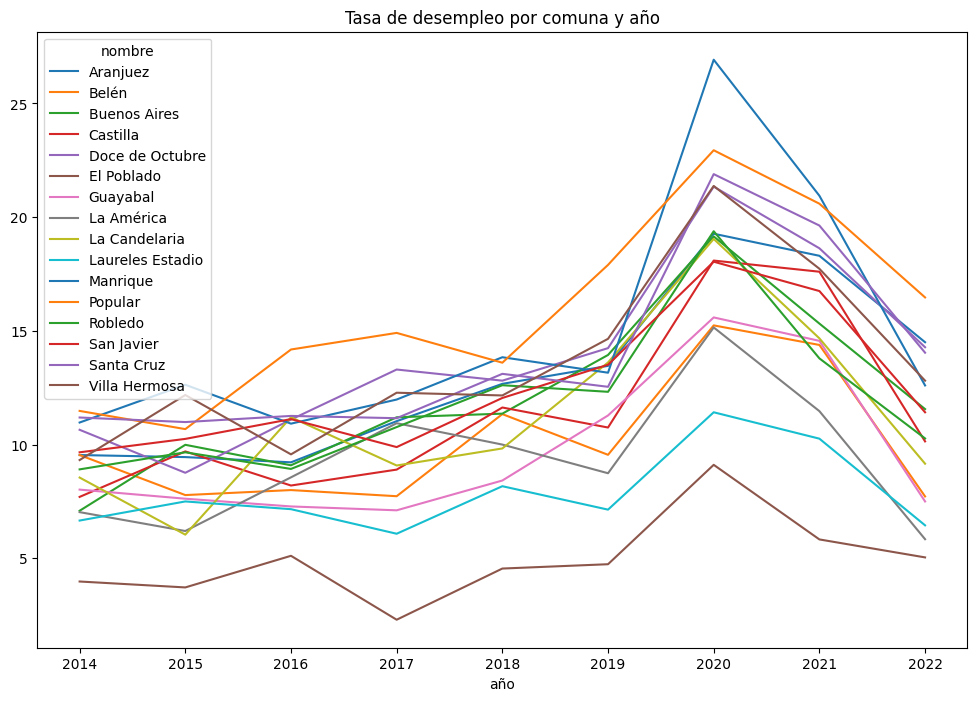

In [52]:
DesempleoPorAño = pivot_comunas_indice(TasaDesmpleo,
                                       tipo_indice='indice', 
                                       prefijo_columna='i_', 
                                       columna_nombre='nombre')    
DesempleoPorAño.plot(x='año', figsize=(12, 8), title='Tasa de desempleo por comuna y año')

In [53]:
DesempleoPorAño

nombre,año,Aranjuez,Belén,Buenos Aires,Castilla,Doce de Octubre,El Poblado,Guayabal,La América,La Candelaria,Laureles Estadio,Manrique,Popular,Robledo,San Javier,Santa Cruz,Villa Hermosa
0,2014,9.54,9.54,7.09,7.70,10.65,3.98,8.02,7.03,8.55,6.66,10.97,11.48,8.91,9.66,11.19,9.32
1,2015,9.45,7.78,9.99,9.70,8.76,3.72,7.62,6.20,6.04,7.50,12.63,10.68,9.66,10.25,10.99,12.18
2,2016,9.22,8.00,9.09,8.20,11.10,5.11,7.28,8.56,11.20,7.16,10.92,14.18,8.93,11.12,11.26,9.57
3,2017,11.03,7.73,11.20,8.90,13.30,2.30,7.11,10.94,9.08,6.08,11.98,14.91,10.77,9.89,11.16,12.28
4,2018,12.67,11.34,11.36,11.63,12.81,4.55,8.42,10.00,9.83,8.17,13.84,13.60,12.61,12.05,13.11,12.16
5,2019,13.46,9.55,13.94,10.75,14.24,4.74,11.28,8.74,13.61,7.14,13.16,17.90,12.32,13.51,12.54,14.65
6,2020,19.27,15.24,19.15,18.09,21.34,9.11,15.59,15.15,19.04,11.42,26.92,22.94,19.38,18.04,21.89,21.37
7,2021,18.30,14.38,15.32,17.60,18.63,5.83,14.56,11.47,14.67,10.26,20.94,20.59,13.79,16.75,19.63,17.73
8,2022,14.50,7.72,11.56,10.14,14.28,5.04,7.50,5.84,9.16,6.45,12.60,16.47,10.27,11.42,14.04,12.81


In [54]:
DesempleoPorAño.to_json('DesempleoPorAñoPorComuna.json')

<Axes: title={'center': 'Proyección de viviendas por comuna y año'}, xlabel='año'>

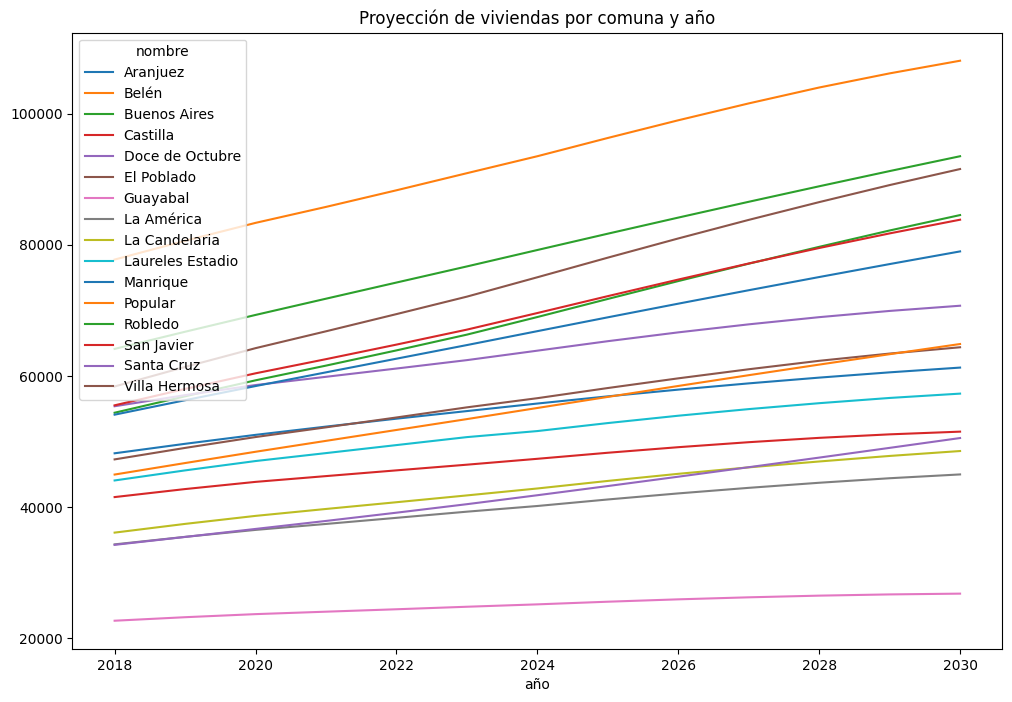

In [55]:
ProVivPorAño = pivot_comunas_indice(ProyeccionViviendas, 
                                     tipo_indice='proyeccion', 
                                     prefijo_columna='i', 
                                     columna_nombre='nombre')
ProVivPorAño.plot(x='año', figsize=(12, 8), title='Proyección de viviendas por comuna y año')

In [56]:
ProVivPorAño

nombre,año,Aranjuez,Belén,Buenos Aires,Castilla,Doce de Octubre,El Poblado,Guayabal,La América,La Candelaria,Laureles Estadio,Manrique,Popular,Robledo,San Javier,Santa Cruz,Villa Hermosa
0,2018,48213.0,77754.0,54398.0,41537.0,55388.0,47283.0,22683.0,34326.0,36118.0,44071.0,54102.0,44973.0,64131.0,55528.0,34251.0,58403.0
1,2019,49660.0,80615.0,56903.0,42758.0,57081.0,49034.0,23219.0,35470.0,37448.0,45606.0,56305.0,46726.0,66747.0,58022.0,35457.0,61377.0
2,2020,51025.0,83349.0,59341.0,43855.0,58619.0,50691.0,23688.0,36532.0,38669.0,47032.0,58466.0,48446.0,69310.0,60408.0,36679.0,64245.0
3,2021,52283.0,85784.0,61583.0,44736.0,59877.0,52170.0,24061.0,37440.0,39724.0,48243.0,60556.0,50110.0,71787.0,62568.0,37899.0,66815.0
4,2022,53491.0,88318.0,63904.0,45611.0,61138.0,53675.0,24430.0,38372.0,40752.0,49465.0,62638.0,51770.0,74251.0,64787.0,39156.0,69437.0
5,2023,54651.0,90926.0,66308.0,46476.0,62420.0,55219.0,24814.0,39311.0,41791.0,50681.0,64717.0,53428.0,76708.0,67071.0,40453.0,72100.0
6,2024,55801.0,93512.0,68992.0,47373.0,63862.0,56616.0,25178.0,40177.0,42848.0,51603.0,66837.0,55123.0,79212.0,69602.0,41818.0,75055.0
7,2025,56896.0,96294.0,71749.0,48296.0,65308.0,58165.0,25582.0,41172.0,44000.0,52822.0,68947.0,56812.0,81701.0,72177.0,43219.0,78048.0
8,2026,57922.0,98993.0,74473.0,49144.0,66653.0,59642.0,25943.0,42097.0,45084.0,53943.0,71029.0,58480.0,84153.0,74704.0,44644.0,80974.0
9,2027,58875.0,101566.0,77126.0,49906.0,67876.0,61027.0,26252.0,42945.0,46068.0,54951.0,73078.0,60123.0,86564.0,77157.0,46091.0,83804.0


In [57]:
ProVivPorAño.to_json('ProyecionViviendaPorAñoPorComuna.json')

<Axes: title={'center': 'Índice multidimensional por comuna y año'}, xlabel='año'>

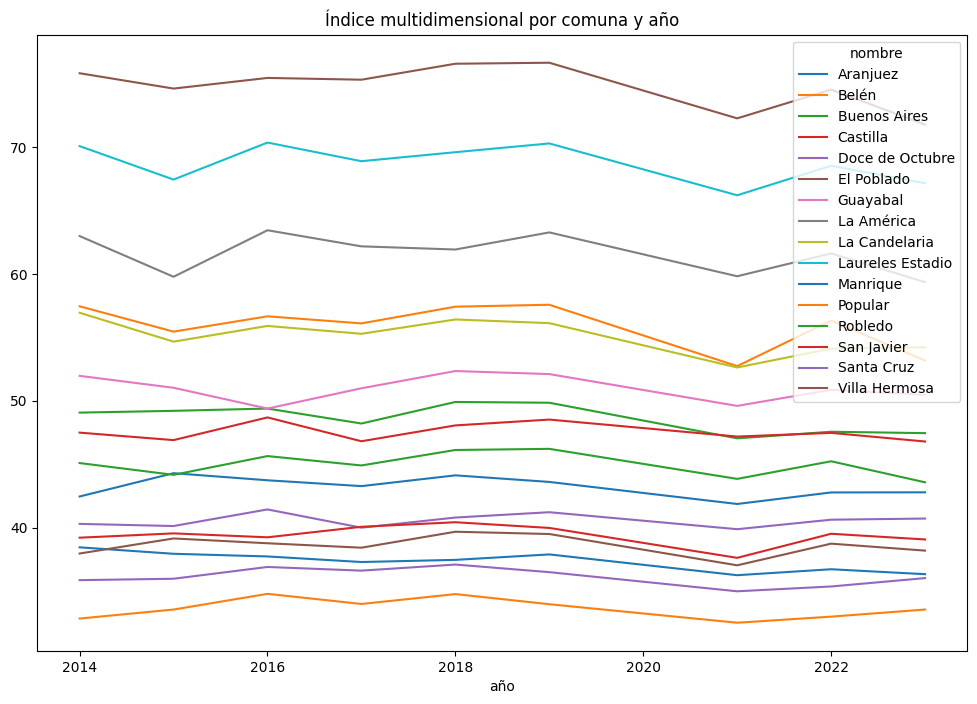

In [58]:
IndiceMultiPorAño = pivot_comunas_indice(IndiceMultidiensional, 
                                         tipo_indice='indice', 
                                         prefijo_columna='i_', 
                                         columna_nombre='nombre')
IndiceMultiPorAño.plot(x='año', figsize=(12, 8), title='Índice multidimensional por comuna y año')

In [59]:
IndiceMultiPorAño

nombre,año,Aranjuez,Belén,Buenos Aires,Castilla,Doce de Octubre,El Poblado,Guayabal,La América,La Candelaria,Laureles Estadio,Manrique,Popular,Robledo,San Javier,Santa Cruz,Villa Hermosa
0,2014,42.45,57.46,49.07,47.49,40.29,75.85,51.97,63.0,56.95,70.1,38.44,32.82,45.09,39.2,35.85,37.95
1,2015,44.29,55.46,49.21,46.9,40.12,74.64,51.03,59.79,54.67,67.46,37.93,33.53,44.16,39.54,35.96,39.14
2,2016,43.73,56.67,49.39,48.69,41.43,75.48,49.39,63.46,55.91,70.38,37.72,34.77,45.64,39.23,36.89,38.76
3,2017,43.27,56.11,48.21,46.81,39.99,75.34,50.99,62.19,55.29,68.91,37.28,33.97,44.9,40.06,36.6,38.41
4,2018,44.12,57.43,49.91,48.06,40.79,76.6,52.35,61.94,56.42,69.62,37.45,34.75,46.12,40.42,37.08,39.67
5,2019,43.6,57.58,49.85,48.52,41.21,76.68,52.11,63.29,56.13,70.31,37.88,33.95,46.21,39.97,36.48,39.49
6,2021,41.86,52.74,47.04,47.18,39.87,72.29,49.6,59.83,52.63,66.22,36.24,32.49,43.84,37.61,34.97,37.02
7,2022,42.77,56.33,47.56,47.47,40.62,74.56,50.87,61.63,54.12,68.55,36.71,32.97,45.23,39.51,35.35,38.73
8,2023,42.78,53.18,47.45,46.79,40.71,71.8,50.47,59.37,54.23,67.17,36.32,33.53,43.57,39.06,36.01,38.18


In [60]:
IndiceMultiPorAño.to_json('IndiceMultidimPorAñoPorComuna.json')

<Axes: title={'center': 'Esperanza de vida total por comuna y año'}, xlabel='año'>

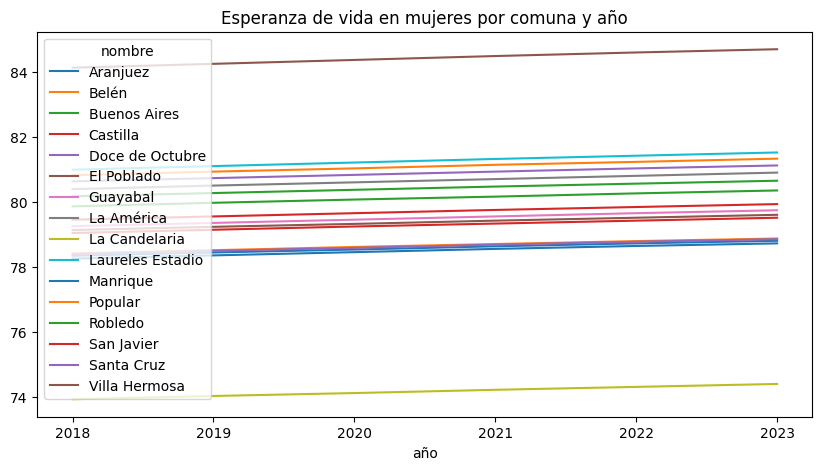

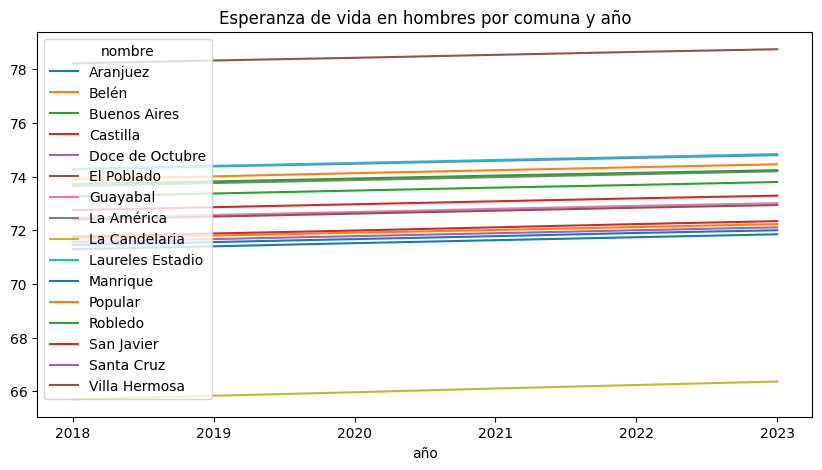

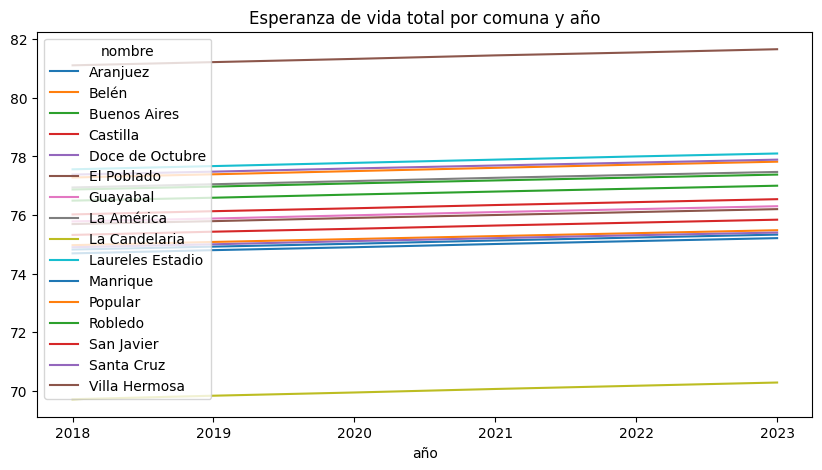

In [61]:

EspeVidaMujerPorAño = pivot_comunas_indice(EsperanzaVida, 
                                           tipo_indice='mujeres', 
                                           prefijo_columna='mujeres_', 
                                           columna_nombre='nombre')
EspeVidaMujerPorAño.plot(x='año', figsize=(10, 5), title='Esperanza de vida en mujeres por comuna y año')
EspeVidaHombrePorAño = pivot_comunas_indice(EsperanzaVida, 
                                            tipo_indice='hombres', 
                                            prefijo_columna='hombres_', 
                                            columna_nombre='nombre')
EspeVidaHombrePorAño.plot(x='año', figsize=(10, 5), title='Esperanza de vida en hombres por comuna y año')
EspeVidaTotalPorAño = pivot_comunas_indice(EsperanzaVida, 
                                           tipo_indice='total', 
                                           prefijo_columna='total_', 
                                           columna_nombre='nombre')
EspeVidaTotalPorAño.plot(x='año', figsize=(10, 5), title='Esperanza de vida total por comuna y año')

In [62]:
EspeVidaMujerPorAño
EspeVidaMujerPorAño.to_json('EsperanzaDevidaMujerPorAñoPorComuna.json')

In [63]:
EspeVidaHombrePorAño
EspeVidaHombrePorAño.to_json('EsperanzaDevidaHombrePorAñoPorComuna.json')

In [64]:
EspeVidaTotalPorAño
EspeVidaTotalPorAño.to_json('EsperanzaDevidaTotalPorAñoPorComuna.json')

In [65]:
dataframes = [EsperanzaVida, IndiceMultidiensional, ProyeccionPoblacion, SedesEducativas, TasaDesmpleo, ProyeccionViviendas]

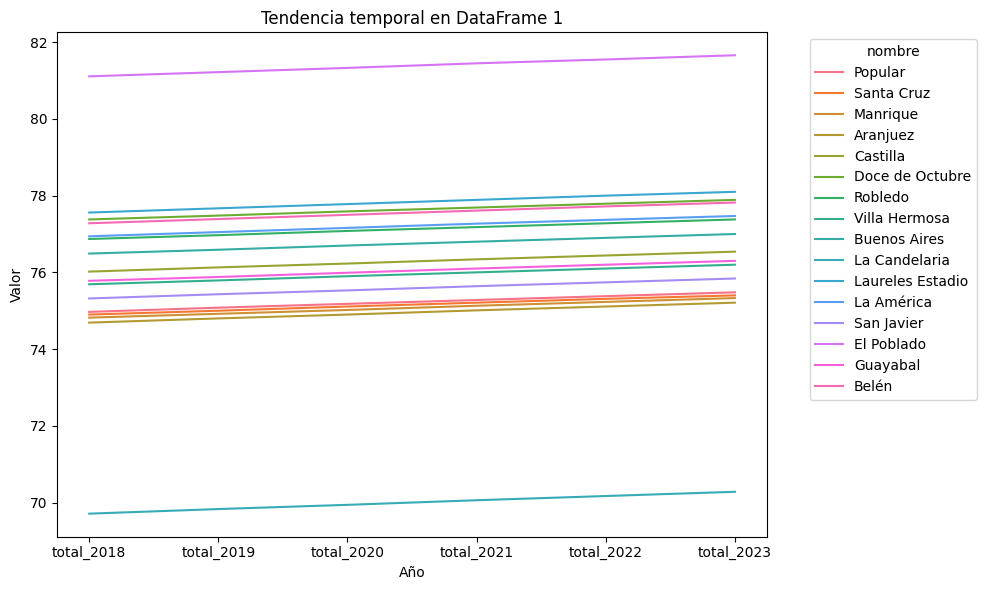

In [66]:
# Aplicar la función al DataFrame 1
valor_columnas_df1 = ['total_2018', 'total_2019', 'total_2020', 'total_2021', 'total_2022', 'total_2023']
analizar_tendencias(EsperanzaVida, 'DataFrame 1', valor_columnas_df1, categoria_columnas=['nombre'])


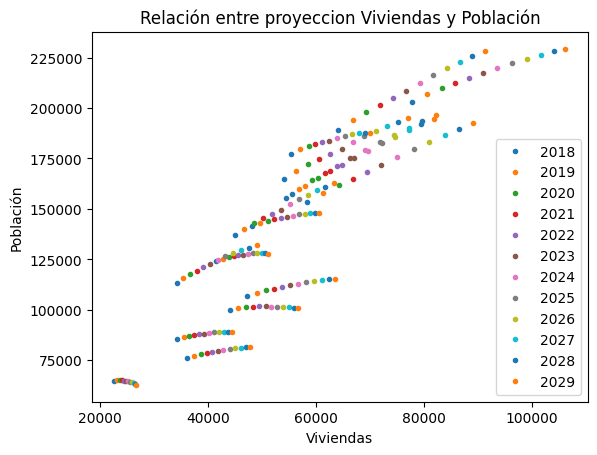

In [67]:
for i in range(2018,2030,1):
    plt.plot(ProyeccionViviendas[f'i{i}'], ProyeccionPoblacion[f'total_{i}'], '.', label=f'{i}')
    plt.xlabel('Viviendas')
    plt.ylabel('Población')
    plt.title('Relación entre proyeccion Viviendas y Población')
    plt.legend()


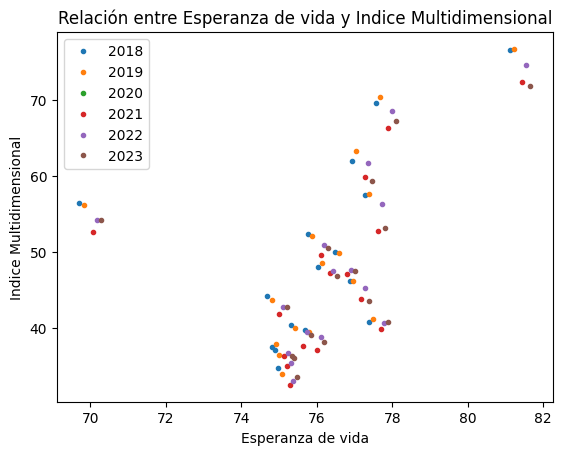

In [68]:
for i in range(2018, 2024, 1):
    # Ensure both series have the same length
    x = EsperanzaVida[f'total_{i}']
    y = IndiceMultidiensional[f'i_{i}']
    
    # Truncate the longer series to match the length of the shorter one
    min_length = min(len(x), len(y))
    x = x[:min_length]
    y = y[:min_length]
    
    plt.plot(x, y, '.', label=f'{i}')
    plt.xlabel('Esperanza de vida')
    plt.ylabel('Indice Multidimensional')
    plt.title('Relación entre Esperanza de vida y Indice Multidimensional')
    plt.legend()


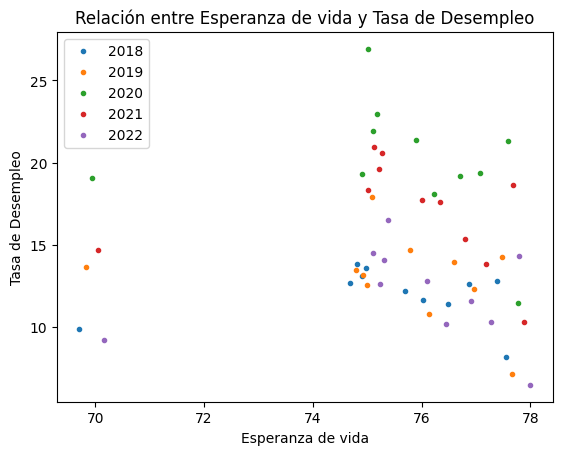

In [69]:
for i in range(2018,2023,1):
    plt.plot(EsperanzaVida[f'total_{i}'][:-5], TasaDesmpleo[f'i_{i}'][:-5], '.', label=f'{i}')
    plt.xlabel('Esperanza de vida')
    plt.ylabel('Tasa de Desempleo')
    plt.title('Relación entre Esperanza de vida y Tasa de Desempleo')
    plt.legend()


In [70]:
import geopandas as gpd
import pandas as pd

def contar_puntos_en_poligonos(gdf_puntos, gdf_poligonos, columna_poligono_id='id_poligono'):
    """
    Cuenta cuántos puntos están dentro de cada polígono.

    Parámetros:
    - gdf_puntos: GeoDataFrame con geometrías de puntos.
    - gdf_poligonos: GeoDataFrame con geometrías de polígonos.
    - columna_poligono_id: Nombre de la columna en gdf_poligonos que identifica de manera única cada polígono.

    Retorna:
    - GeoDataFrame con el conteo de puntos dentro de cada polígono.
    """

    # Asegurarse de que ambos GeoDataFrames estén en el mismo sistema de coordenadas
    if gdf_puntos.crs != gdf_poligonos.crs:
        gdf_puntos = gdf_puntos.to_crs(gdf_poligonos.crs)

    # Realizar un 'spatial join' para asignar cada punto al polígono correspondiente
    puntos_en_poligonos = gpd.sjoin(
        gdf_puntos, 
        gdf_poligonos[[columna_poligono_id, 'geometry']], 
        how='left', 
        predicate='within'  # Reemplazo de 'op' por 'predicate'
    )

    # Contar cuántos puntos hay en cada polígono
    conteo = puntos_en_poligonos.groupby(columna_poligono_id).size().reset_index(name='conteo_puntos')

    # Combinar el conteo con el GeoDataFrame de polígonos
    resultado = gdf_poligonos.merge(conteo, on=columna_poligono_id, how='left')

    # Reemplazar valores nulos por cero (para polígonos sin puntos dentro)
    resultado['conteo_puntos'] = resultado['conteo_puntos'].fillna(0).astype(int)

    return resultado


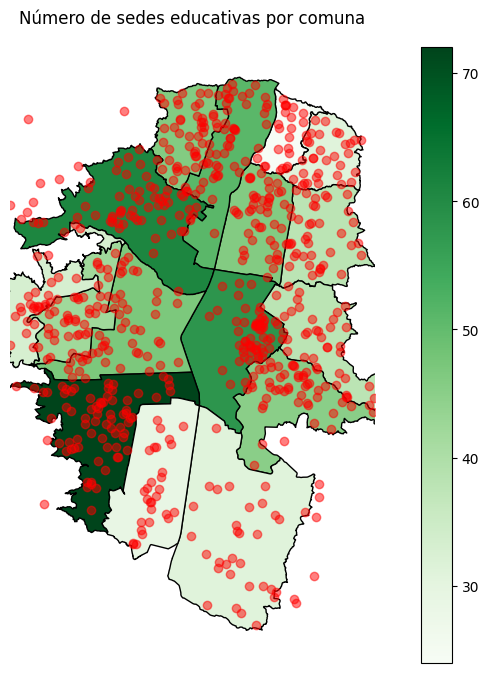

In [71]:
sedesEducativasPorComuna = contar_puntos_en_poligonos(SedesEducativas, comunas, columna_poligono_id='nombre')   
sedesEducativasPorComuna.plot(column='conteo_puntos', legend=True, figsize=(12, 8), cmap='Greens', edgecolor='k')
SedesEducativas.plot(color='red', alpha=0.5, ax=plt.gca())
plt.title('Número de sedes educativas por comuna')
plt.axis('off')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.show()


In [72]:
ProyeccionPoblacion = ProyeccionPoblacion.sort_values(by='nombre')
sedesEducativasPorComuna = sedesEducativasPorComuna.sort_values(by='nombre')


In [73]:
sedesEducativasPorComuna['densidadSedesPoblacion2018'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2018']
sedesEducativasPorComuna['densidadSedesPoblacion2019'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2019']
sedesEducativasPorComuna['densidadSedesPoblacion2020'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2020']
sedesEducativasPorComuna['densidadSedesPoblacion2021'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2021']
sedesEducativasPorComuna['densidadSedesPoblacion2022'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2022']
sedesEducativasPorComuna['densidadSedesPoblacion2023'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2023']
sedesEducativasPorComuna['densidadSedesPoblacion2024'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2024']
sedesEducativasPorComuna['densidadSedesPoblacion2025'] = sedesEducativasPorComuna['conteo_puntos'] / ProyeccionPoblacion['total_2025']

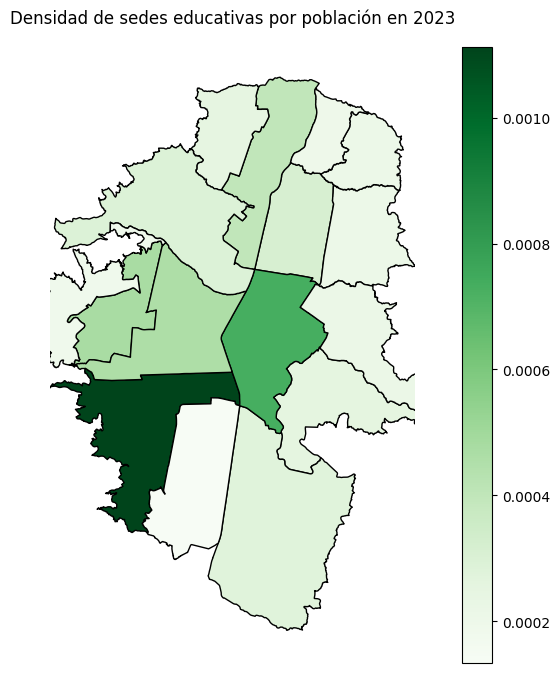

In [74]:
sedesEducativasPorComuna.plot(column='densidadSedesPoblacion2023', legend=True, figsize=(12, 8), cmap='Greens', edgecolor='k')
plt.title('Densidad de sedes educativas por población en 2023')
plt.axis('off')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.show()

In [75]:
# Llamar a la función para obtener el conteo de puntos en cada polígono
resultado = contar_puntos_en_poligonos(
    gdf_puntos=SedesEducativas, 
    gdf_poligonos=IndiceMultidiensional, 
    columna_poligono_id='nombre'
)

resultado['cambio de indice promedio'] = resultado['i_2023'] - resultado['i_2014']
resultado['indice medio'] = resultado[['i_2014', 'i_2015', 'i_2016', 'i_2017', 'i_2018', 'i_2019', 'i_2020', 'i_2021', 'i_2022', 'i_2023']].mean(axis=1)
resultado['densidad de puntos'] = resultado['conteo_puntos'] / resultado['Shape_Area']
resultado.sample(5)


,OBJECTID,codigo,nombre,i_2014,i_2015,i_2016,i_2017,i_2018,i_2019,i_2020,i_2021,i_2022,i_2023,Shape_Length,Shape_Area,geometry,conteo_puntos,cambio de indice promedio,indice medio,densidad de puntos
6,7,07,Robledo,45.09,44.16,45.64,44.90,46.12,46.21,None,43.84,45.23,43.57,23265.233431,9.462008e+06,"POLYGON ((4713487.934 2254398.619, 4713487.771...",61,-1.52,44.973333,0.000006
10,11,11,Laureles Estadio,70.10,67.46,70.38,68.91,69.62,70.31,None,66.22,68.55,67.17,16365.175496,7.402669e+06,"POLYGON ((4713365.762 2251348.946, 4713364.975...",47,-2.93,68.746667,0.000006
0,1,01,Popular,32.82,33.53,34.77,33.97,34.75,33.95,None,32.49,32.97,33.53,9604.448562,3.097941e+06,"POLYGON ((4718193.072 2255308.014, 4718182.769...",31,0.71,33.642222,0.000010
5,6,06,Doce de Octubre,40.29,40.12,41.43,39.99,40.79,41.21,None,39.87,40.62,40.71,10709.846407,3.849812e+06,"POLYGON ((4715116.584 2256050.193, 4715114.635...",46,0.42,40.558889,0.000012
4,5,05,Castilla,47.49,46.90,48.69,46.81,48.06,48.52,None,47.18,47.47,46.79,16098.032108,6.063916e+06,"POLYGON ((4716246.187 2256230.621, 4716238.195...",51,-0.70,47.545556,0.000008


<Axes: title={'center': 'Indice multidimensional por comuna y año'}, xlabel='año'>

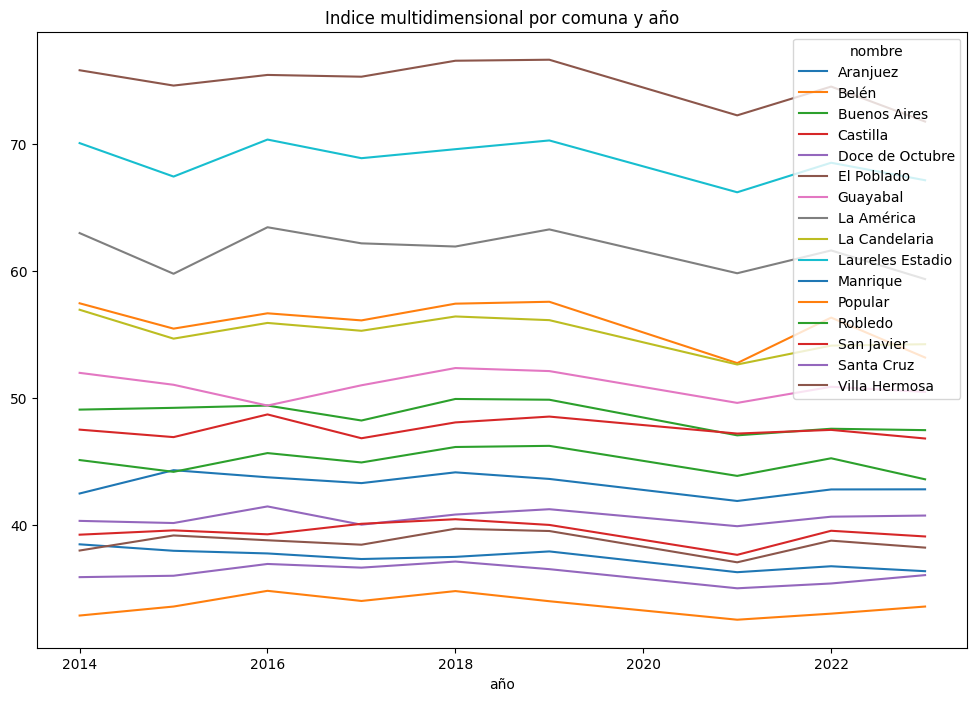

In [76]:
resultadoPorAño = pivot_comunas_indice(resultado,
                                        tipo_indice='indice', 
                                        prefijo_columna='i_', 
                                        columna_nombre='nombre')
resultadoPorAño.plot(x='año', figsize=(12, 8), title='Indice multidimensional por comuna y año')

In [77]:
resultadoPorAño

nombre,año,Aranjuez,Belén,Buenos Aires,Castilla,Doce de Octubre,El Poblado,Guayabal,La América,La Candelaria,Laureles Estadio,Manrique,Popular,Robledo,San Javier,Santa Cruz,Villa Hermosa
0,2014,42.45,57.46,49.07,47.49,40.29,75.85,51.97,63.0,56.95,70.1,38.44,32.82,45.09,39.2,35.85,37.95
1,2015,44.29,55.46,49.21,46.9,40.12,74.64,51.03,59.79,54.67,67.46,37.93,33.53,44.16,39.54,35.96,39.14
2,2016,43.73,56.67,49.39,48.69,41.43,75.48,49.39,63.46,55.91,70.38,37.72,34.77,45.64,39.23,36.89,38.76
3,2017,43.27,56.11,48.21,46.81,39.99,75.34,50.99,62.19,55.29,68.91,37.28,33.97,44.9,40.06,36.6,38.41
4,2018,44.12,57.43,49.91,48.06,40.79,76.6,52.35,61.94,56.42,69.62,37.45,34.75,46.12,40.42,37.08,39.67
5,2019,43.6,57.58,49.85,48.52,41.21,76.68,52.11,63.29,56.13,70.31,37.88,33.95,46.21,39.97,36.48,39.49
6,2021,41.86,52.74,47.04,47.18,39.87,72.29,49.6,59.83,52.63,66.22,36.24,32.49,43.84,37.61,34.97,37.02
7,2022,42.77,56.33,47.56,47.47,40.62,74.56,50.87,61.63,54.12,68.55,36.71,32.97,45.23,39.51,35.35,38.73
8,2023,42.78,53.18,47.45,46.79,40.71,71.8,50.47,59.37,54.23,67.17,36.32,33.53,43.57,39.06,36.01,38.18


<Axes: >

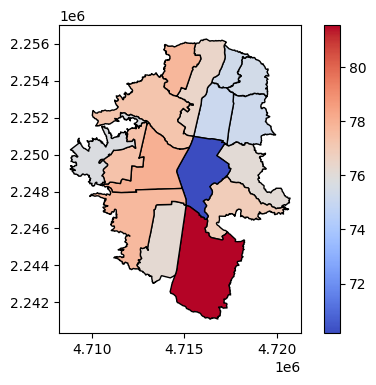

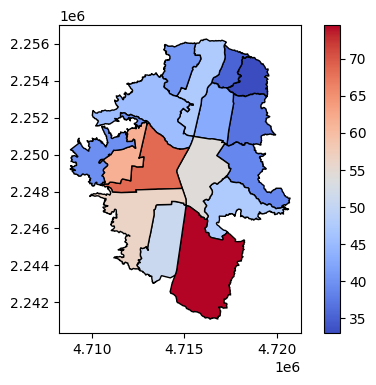

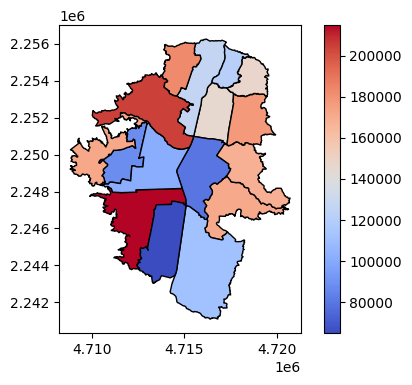

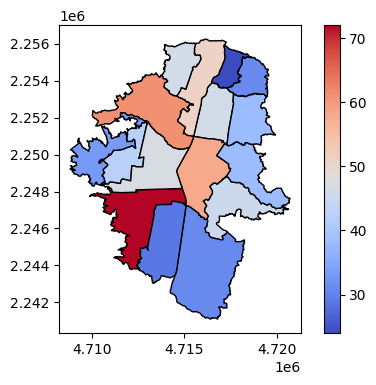

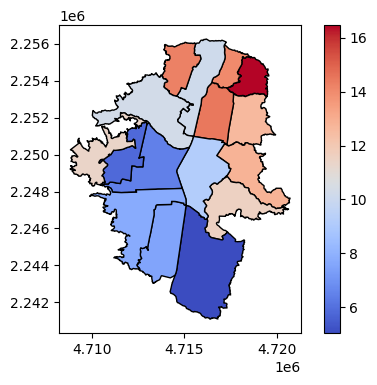

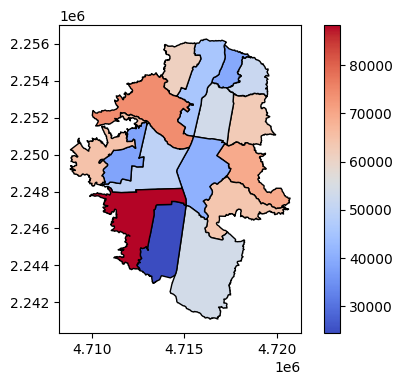

In [78]:
EsperanzaVida.plot(column='total_2022', legend=True, figsize=(6, 4), cmap='coolwarm', edgecolor='k')
IndiceMultidiensional.plot(column='i_2022', legend=True, figsize=(6, 4), cmap='coolwarm', edgecolor='k')    
ProyeccionPoblacion.plot(column='total_2022', legend=True, figsize=(6, 4), cmap='coolwarm', edgecolor='k')
sedesEducativasPorComuna.plot(column='conteo_puntos', legend=True, figsize=(6, 4), cmap='coolwarm', edgecolor='k')
TasaDesmpleo.plot(column='i_2022', legend=True, figsize=(6, 4), cmap='coolwarm', edgecolor='k')
ProyeccionViviendas.plot(column='i2022', legend=True, figsize=(6, 4), cmap='coolwarm', edgecolor='k')


In [79]:
# Create a new DataFrame with the calculated densities
indiceGlobal = pd.DataFrame({
	'lifeExpectancy2022': EsperanzaVida['total_2022'],
	'MultidimIndex2022': IndiceMultidiensional['i_2022'],
	'ProyecPobla2022': ProyeccionPoblacion['total_2022']/10000,
	'EdDensityPoblation2022': sedesEducativasPorComuna['densidadSedesPoblacion2022']*100000,
	'Unemploy2022': -2*TasaDesmpleo['i_2022'],
    'ProyecHousing2022': ProyeccionViviendas['i2022']/1000
})

# Sum the densities to create a global index
indiceGlobal['global_index_socialEconomic'] = indiceGlobal.sum(axis=1)

# Add the geometry and 'nombre' from the comunas GeoDataFrame
indiceGlobal = gpd.GeoDataFrame(indiceGlobal, geometry=comunas['geometry'])
indiceGlobal['nombre'] = comunas['nombre'].values


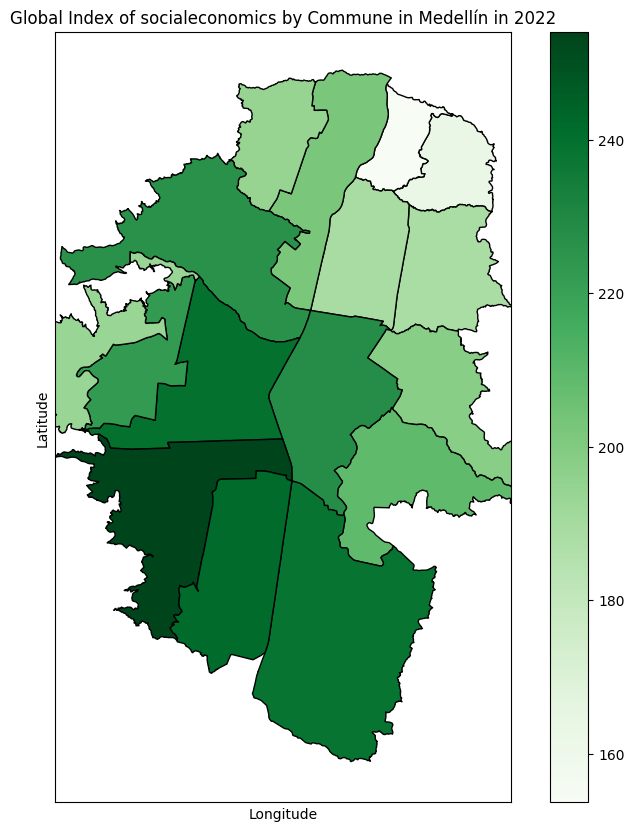

In [80]:
# Display the result
indiceGlobal.plot(column='global_index_socialEconomic', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')
plt.title('Global Index of socialeconomics by Commune in Medellín in 2022')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [81]:
indiceGlobal.sort_values(by='global_index_socialEconomic', ascending=False, inplace=True)
indiceGlobal

,lifeExpectancy2022,MultidimIndex2022,ProyecPobla2022,EdDensityPoblation2022,Unemploy2022,ProyecHousing2022,global_index_socialEconomic,geometry,nombre
14,76.20,50.87,6.4856,111.015172,-15.00,24.430,254.000772,"POLYGON ((4711053.441 2248131.802, 4711049.428...",Belén
15,77.72,56.33,21.4967,13.490443,-15.44,88.318,241.915143,"POLYGON ((4713505.791 2243146.678, 4713505.99 ...",Guayabal
10,78.00,68.55,10.1632,46.245277,-12.90,49.465,239.523477,"POLYGON ((4713365.762 2251348.946, 4713364.975...",Laureles Estadio
13,81.55,74.56,11.1343,27.841894,-10.08,53.675,238.681194,"POLYGON ((4715808.616 2246717.305, 4715808.422...",El Poblado
9,70.17,54.12,7.8937,73.476317,-18.32,40.752,228.092017,"POLYGON ((4716374.474 2250846.788, 4716331.146...",La Candelaria
6,77.28,45.23,20.4954,29.762776,-20.54,74.251,226.479176,"POLYGON ((4713487.934 2254398.619, 4713487.771...",Robledo
11,77.37,61.63,8.7849,47.809309,-11.68,38.372,222.286209,"POLYGON ((4712943.442 2251744.131, 4712939.495...",La América
8,76.90,47.56,17.1416,26.251925,-23.12,63.904,208.637525,"POLYGON ((4717386.83 2248752.267, 4717385.652 ...",Buenos Aires
4,76.44,47.47,12.6939,40.176778,-20.28,45.611,202.111678,"POLYGON ((4716246.187 2256230.621, 4716238.195...",Castilla
7,76.10,38.73,16.8399,22.565455,-25.62,69.437,198.052355,"POLYGON ((4717867.132 2250665.308, 4717865.134...",Villa Hermosa


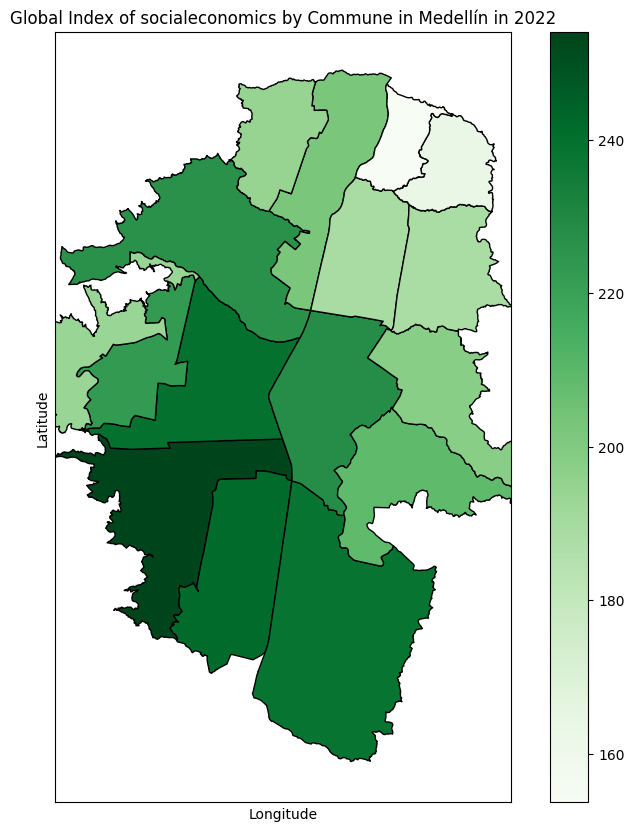

In [84]:
indiceGlobal.plot( column='global_index_socialEconomic', legend=True, figsize=(10, 10), cmap='Greens', edgecolor='black')   
plt.title('Global Index of socialeconomics by Commune in Medellín in 2022')
plt.xlim(minx, maxx)
plt.ylim(miny, maxy)
plt.xticks([])
plt.yticks([])
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [82]:
# exportamos los datos del gdf global a geojson
indiceGlobal.to_file('indice_global_SE.geojson', driver='GeoJSON')